# Shopify Sneaker Shops AOV

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
data = pd.read_csv('Data_Science_Intern_Challenge_DataSet.csv')
data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [5]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [6]:
data['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

Using data['order_amount'].describe(), here we obtain Mean of Order Amount is 3,145.13 which is given as value of AOV over a month window.
This occurs because we have just calculated total sum of Order Amounts and divided it with total count of Orders.
Also, we can see the Standard Deviation is 41282.53, which means that Value varies a lot from the Mean Value.
Henceforth, Mean is not a very useful representation of AOV.

Here, using data['order_amount'].describe(), We observe that:- 
Minimum value of Order Amount is 90.0
Maximum value of Order Amount is 704000.0
25 percentile value of Order Amount is 163.0
50 percentile value of Order Amount i.e. Median is 284.0
75 percentile value of Order Amount is 390.0
Here, we can see that these values 25 percentile, Median and 75 percentile values are very much smaller than the Maximum Value.
So, There are a few outliers that are making up the Average Value of Order Amount calculated as Mean to be very high.

Now, we are going to check out the Distribution of Order Amount. For that, we are going to use Box Plot.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='order_amount'>

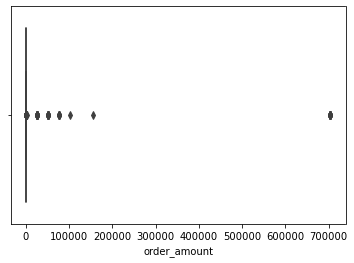

In [12]:
sns.boxplot(data['order_amount'])

Here,we can see the Plot that Entire Box portion of the Plot is along 0. This showcases  presence of lots of Outliers.
Henceforth, due to these Outliers, the Value of Mean became very high.

Now, we are going to group the data by Order Amount to check for number of entries for each group and then sort the values in Descending Order.

In [28]:
unique_amounts = data.groupby(['order_amount']).size().reset_index(name='count').sort_values(by='order_amount',ascending=False)
unique_amounts
unique_amounts.head(10)

,order_amount,count
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


Here, we can observe that Order Amounts such as 704000, 77175, 51450 and 25725 occur repeatedly.

Checking for these Higher Prices of Order Amounts in Original Dataset about when they are paid for, to whom they are paid and what are the count of items purchased through this payment of Order.

In [34]:
data_original = data.loc[data['order_amount'].isin([704000,77175,51450, 25725])].sort_values(by='order_amount',ascending=False)
pd.set_option('display.max_rows', None)
data_original

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00


Here, we can see that Amount of 704000 is paid to the Same Shop at the same time as a whole and by the same user and the Total Number of Items is constant i.e. 2000.

The data for Amounts of 25725, 51450 and 77175 are similar in terms of Shop Id. It appears as the number of count of items are 1, 2 and 3 respectively. 

As we have seen that the AOV value is more than expected for a relatively affordable item Shoe, we would like to perform Data Cleaning so as to perform better evaluation.

In [42]:
#IQR RANGE Calculation
Q_25 = data['order_amount'].quantile(0.25)
Q_75 = data['order_amount'].quantile(0.75)
IQR = Q_75-Q_25
data_clean = data[(data['order_amount']<(Q_75+(IQR*1.5))) & (data['order_amount']>(Q_25-(IQR*1.5)))]
pd.set_option('display.max_rows', 10)
data_clean

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [43]:
data_clean.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,2497.395966,49.852645,849.905742,293.715374,1.950196
std,1443.356555,29.049171,86.887496,144.453395,0.919791
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1244.500000,24.000000,776.000000,162.000000,1.000000
50%,2498.000000,50.000000,850.000000,280.000000,2.000000
75%,3749.500000,74.000000,925.000000,380.000000,3.000000
max,5000.000000,100.000000,999.000000,730.000000,5.000000


Here we can see that, now the Data Mean has reached to 293.7 after Cleaning. Also the Standard Deviation of Data over Mean Value is 144.5 which looks much more reasonable.

Now, Plotting once again the distribution of Order Amount

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='order_amount'>

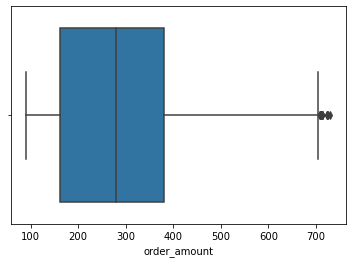

In [44]:
sns.boxplot(data_clean['order_amount'])

Here we can see in the plot that The Distribution is more concentrated towards lower values. So, I would prefer the Median value of the Cleaned Dataset to be the metric for the AOV.

As we can see the Median Value using data_clean['order_amount'].describe(), we got to see the Median value as 280.